# **Estimating horse fatalities from colic**
# Logistic Regression
Try to predict if a horse with colic will live or die.
1. Load the dataset (Use pandas )
2. Data Preprocessing (Handling NA values)
3. Generate a model

In [89]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/HorseDetails.csv")


In [92]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [93]:
data.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [94]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [95]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

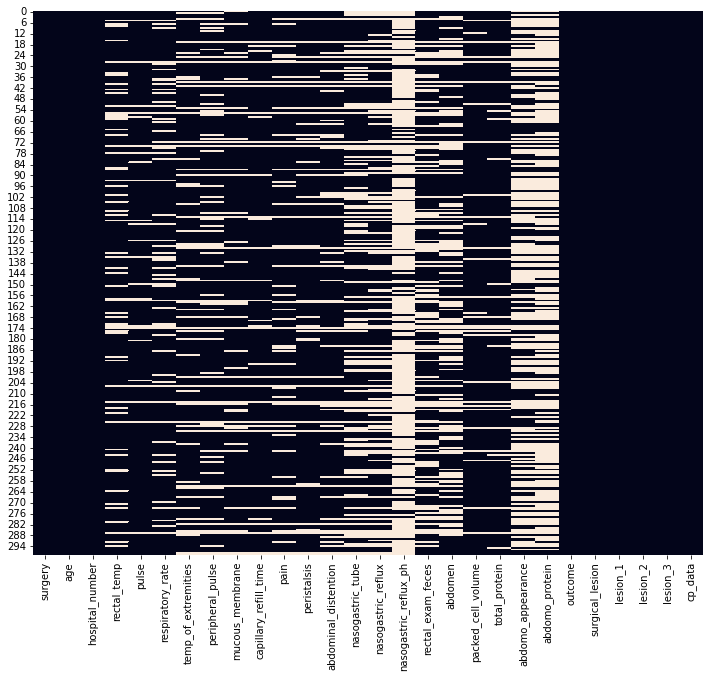

In [96]:
fig, ax = plt.subplots(figsize=(12,10))
sb.heatmap(data.isnull(), cbar = False, ax = ax)

In [97]:
data. drop(["hospital_number","nasogastric_reflux_ph","abdomo_protein","abdomo_appearance","cp_data"], axis=1, inplace=True)

In [98]:
data.loc[data['lesion_1'] > 0, 'lesion_1'] = 1
data.loc[data['lesion_2'] > 0, 'lesion_2'] = 1
data.loc[data['lesion_3'] > 0, 'lesion_3'] = 1

data['num_lesions'] = (data['lesion_1'] + data['lesion_2'] + data['lesion_3']).astype('float64')
data.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1, inplace=True)

In [99]:
data['surgery'] = data['surgery'].map({'yes':1, 'no':2}).astype('float64')
data['age'] = data['age'].map({'adult':1, 'young':2}).astype('float64')
data['temp_of_extremities'] = data['temp_of_extremities'].map({'normal':1, 'warm':2, 'cool':3, 'cold':4}).astype('float64')
data['peripheral_pulse'] = data['peripheral_pulse'].map({'normal':1, 'increased':2, 'reduced':3, 'absent':4}).astype('float64')
data['mucous_membrane'] = data['mucous_membrane'].map({'normal_pink':1, 'bright_pink':2, 'pale_pink':3, 'pale_cyanotic':4, 'bright_red':5, 'dark_cyanotic':6}).astype('float64')
data['capillary_refill_time'] = data['capillary_refill_time'].map({'less_3_sec':1, '3':2, 'more_3_sec':2}).astype('float64')
data['pain'] = data['pain'].map({'alert':1, 'depressed':2, 'mild_pain':3, 'severe_pain':4,  'extreme_pain':5}).astype('float64')
data['peristalsis'] = data['peristalsis'].map({'hypermotile':1, 'normal':2, 'hypomotile':3, 'absent':4}).astype('float64')
data['abdominal_distention'] = data['abdominal_distention'].map({'none':1, 'slight':2, 'moderate':3, 'severe':4}).astype('float64')
data['nasogastric_tube'] = data['nasogastric_tube'].map({'none':1, 'slight':2, 'significant':3}).astype('float64')
data['nasogastric_reflux'] = data['nasogastric_reflux'].map({'none':1, 'more_1_liter':2, 'less_1_liter':3}).astype('float64')
data['rectal_exam_feces'] = data['rectal_exam_feces'].map({'normal':1, 'increased':2, 'decreased':3, 'absent':4}).astype('float64')
data['abdomen'] = data['abdomen'].map({'normal':1, 'other':2, 'firm':3, 'distend_small':4, 'distend_large':5}).astype('float64')
data['surgical_lesion'] = data['surgical_lesion'].map({'yes':1, 'no':2}).astype('float64')
data['outcome'] = data['outcome'].map({'lived':1, 'died':2, 'euthanized':3}).astype('float64')

In [100]:
data['total_protein'].fillna(value = data['total_protein'].mean(), inplace=True)
data['packed_cell_volume'].fillna(value = data['packed_cell_volume'].mean(), inplace=True)
data['pulse'].fillna(value = data['pulse'].mean(), inplace=True)
data['respiratory_rate'].fillna(value = data['respiratory_rate'].mean(), inplace=True)
data['rectal_temp'].fillna(value = data['rectal_temp'].mean(), inplace=True)

In [101]:
data['temp_of_extremities'].value_counts(dropna=False)

3.0    108
1.0     78
NaN     56
2.0     30
4.0     27
Name: temp_of_extremities, dtype: int64

In [102]:
data['temp_of_extremities'].fillna(value = data['temp_of_extremities'].mode()[0], inplace=True)
data['peripheral_pulse'].fillna(value = data['peripheral_pulse'].mode()[0], inplace=True)
data['mucous_membrane'].fillna(value = data['mucous_membrane'].mode()[0], inplace=True)
data['capillary_refill_time'].fillna(value = data['capillary_refill_time'].mode()[0], inplace=True)
data['pain'].fillna(value = data['pain'].mode()[0], inplace=True)
data['peristalsis'].fillna(value = data['peristalsis'].mode()[0], inplace=True)
data['abdominal_distention'].fillna(value = data['abdominal_distention'].mode()[0], inplace=True)
data['nasogastric_tube'].fillna(value = data['nasogastric_tube'].mode()[0], inplace=True)
data['nasogastric_reflux'].fillna(value = data['nasogastric_reflux'].mode()[0], inplace=True)
data['rectal_exam_feces'].fillna(value = data['rectal_exam_feces'].mode()[0], inplace=True)
data['abdomen'].fillna(value = data['abdomen'].mode()[0], inplace=True)

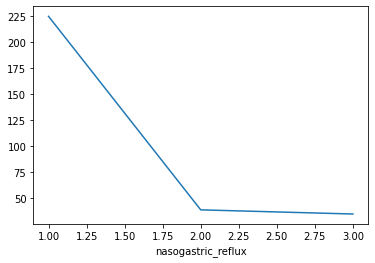

In [103]:
nr_dis = data.groupby(by='nasogastric_reflux').size()
nr_dis.plot()

In [104]:
data.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
num_lesions              0
dtype: int64

In [105]:
data.describe()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,num_lesions
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.397993,1.080268,38.168619,72.000000,30.460581,2.468227,1.785953,2.561873,1.267559,2.956522,...,2.033445,1.839465,1.364548,3.180602,4.204013,46.307407,24.274436,1.551839,1.364548,0.839465
std,0.490305,0.272162,0.655730,27.468469,15.853977,0.976997,1.010517,1.636010,0.443428,1.182130,...,1.080122,0.538125,0.683615,1.176172,1.326745,9.915919,25.804620,0.737187,0.482110,0.442288
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.300000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,37.900000,48.500000,20.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,1.000000,3.000000,4.000000,39.000000,6.600000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,38.168619,68.000000,30.000000,3.000000,1.000000,2.000000,1.000000,3.000000,...,2.000000,2.000000,1.000000,4.000000,5.000000,46.000000,7.700000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,34.500000,3.000000,3.000000,4.000000,2.000000,4.000000,...,3.000000,2.000000,1.000000,4.000000,5.000000,50.000000,52.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,2.000000,5.000000,...,4.000000,3.000000,3.000000,4.000000,5.000000,75.000000,89.000000,3.000000,2.000000,3.000000


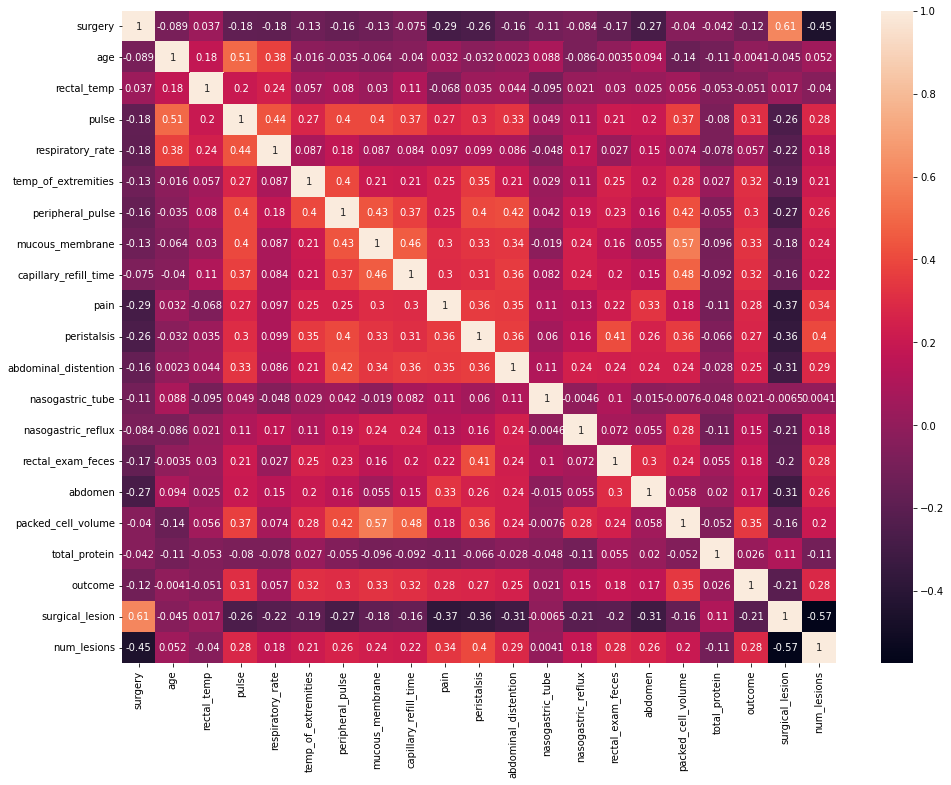

In [106]:
fig, ax = plt.subplots(figsize=(16,12))
correl = data.corr()
sb.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, annot=True, ax = ax)

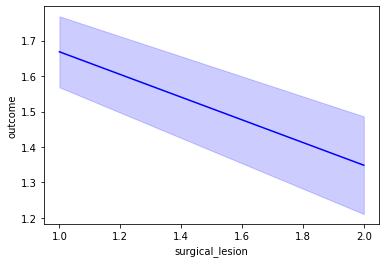

In [107]:
sb.lineplot(x = data['surgical_lesion'], y = data['outcome'], color='b')

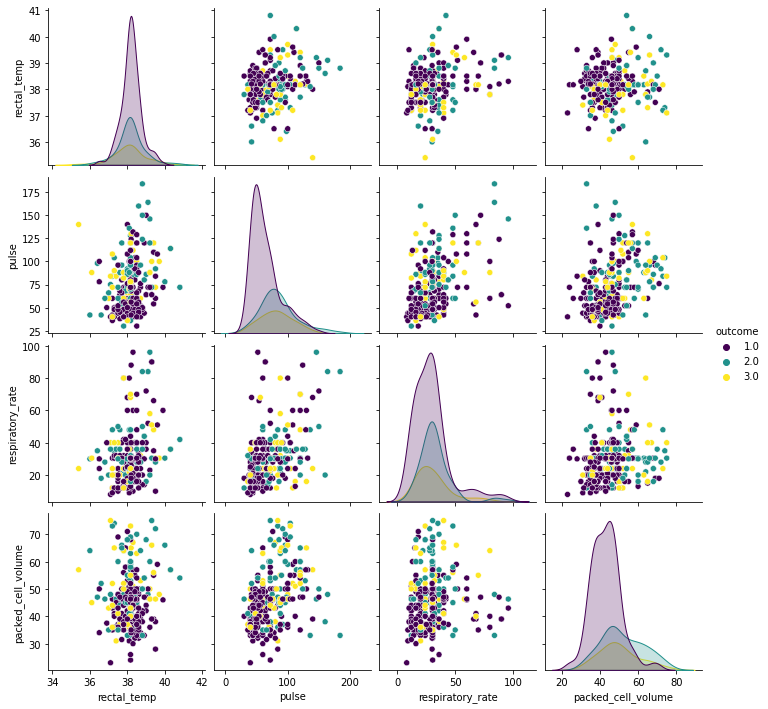

In [108]:
chosen_cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'outcome']
sb.pairplot(data[chosen_cols], hue='outcome', palette = 'viridis')

In [109]:
targetOutput = data['outcome']
data. drop(['outcome'], axis=1, inplace=True)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data, targetOutput, train_size = 0.8, test_size = 0.2, random_state = 0);

In [111]:
lr = LogisticRegression(solver='newton-cg' ,max_iter = 300)

In [112]:
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.55


In [113]:
print(lr.score(X_train, y_train))

0.7573221757322176


In [114]:
y_pred = lr.predict(X_test)

In [115]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[24,  9,  8],
       [ 2,  6,  2],
       [ 5,  1,  3]])